# Proyecto # 1 - Ciencia de datos en Python

### 1. Creación de entorno

In [2]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
# Carga de datos
dsHousePrice = np.load('./proyecto_training_data.npy')
rows, cols = dsHousePrice.shape

### 2. Creación de datasets de 80% entrenamiento y 20% pruebas usando slicing  de NumPy

In [6]:
#obteniendo las filas por porcentaje
p_training = int(rows*0.8)
np.random.shuffle(dsHousePrice)

# 80% Entrenamiento
train = dsHousePrice[:p_training]

# 20% Pruebas
test = dsHousePrice[p_training:]

print(train.shape)
print(test.shape)

(1168, 6)
(292, 6)


### 3. Análisis Exploratorio de datos usando pandas

In [ ]:
# Transformando el arrlego de numpy a dataframe para el análisis exploratorio con Pandas
dfHousePrice = pd.DataFrame(dsHousePrice, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
train = pd.DataFrame(train, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
test = pd.DataFrame(test, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
#dfHousePrice.head(3)
#train.head(3)
#test.head(3)

In [10]:
# Se obtiene la columna con datos nulos y se procede a imputar
print(f'Nulos antes de imputar: ',dfHousePrice['LotFrontage'].isnull().sum())

tipo = dfHousePrice['LotFrontage'].dtype

valor_a_imputar = dfHousePrice['LotFrontage'].mean()

dfHousePrice['LotFrontage'].fillna(valor_a_imputar, inplace=True)

print(f'Nulos después de imputar: ',dfHousePrice['LotFrontage'].isnull().sum())

Nulos antes de imputar:  259
Nulos después de imputar:  0


In [72]:
# Función para obtener escala de variables
def get_df_variable_scale_type(dataset):
    continuas = []
    discretas = []
    categoricas = []

    for col in dataset.columns:
        tipoDato = dataset[col].dtype
        if ((tipoDato == 'int64') or (tipoDato == 'float64')):
            if(len(dataset[col].unique()) > 30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return continuas, discretas, categoricas

In [73]:
continuas, discretas, categoricas = get_df_variable_scale_type(dfHousePrice)

In [76]:
continuas

['SalePrice', '1stFlrSF', 'YearBuilt', 'LotFrontage']

In [75]:
discretas

['OverallQual', 'TotRmsAbvGrd']

In [74]:
categoricas

[]

### Análisis exploratorio e Histogramas de cada variable del dataset

SalePrice
Mínimo: 34900.0
Media: 180921.19589041095
Máximo: 755000.0
Rango: 720100.0
Desviación: 79442.50288288663


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


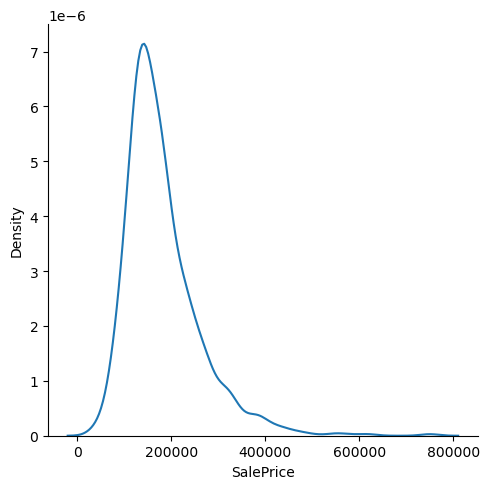

--------------------------------------------------
1stFlrSF
Mínimo: 334.0
Media: 1162.626712328767
Máximo: 4692.0
Rango: 4358.0
Desviación: 386.5877380410738


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


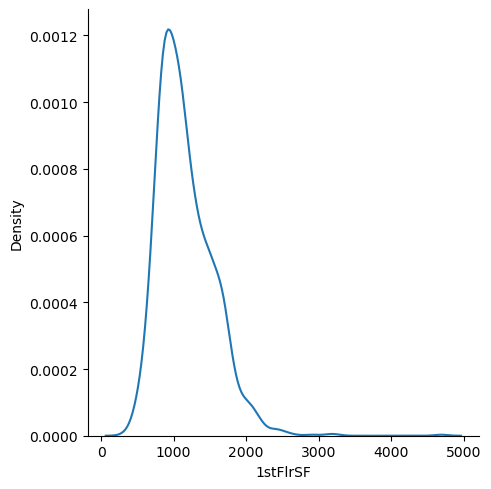

--------------------------------------------------
YearBuilt
Mínimo: 1872.0
Media: 1971.267808219178
Máximo: 2010.0
Rango: 138.0
Desviación: 30.202904042525265


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


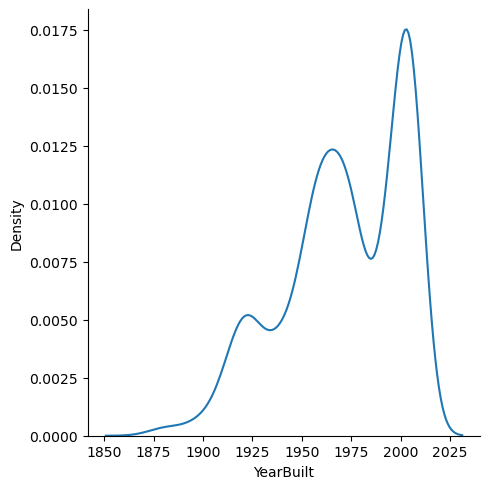

--------------------------------------------------


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


LotFrontage
Mínimo: 21.0
Media: 70.04995836802664
Máximo: 313.0
Rango: 292.0
Desviación: 22.024022688706943


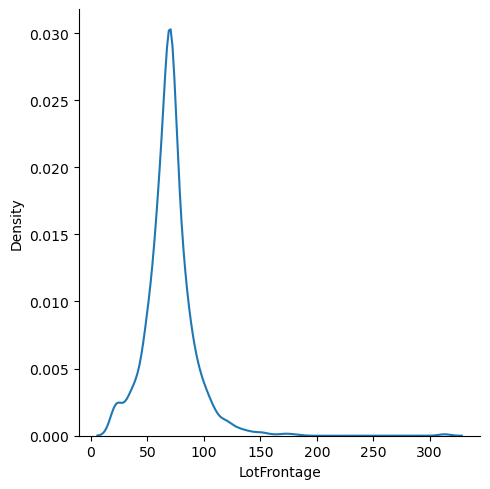

--------------------------------------------------


In [88]:
# Inciso 
for col in continuas:
    estadisticos = dfHousePrice[col].describe()
    print(col)
    print(f'Mínimo: {estadisticos["min"]}')
    print(f'Media: {estadisticos["mean"]}')
    print(f'Máximo: {estadisticos["max"]}')
    print(f'Rango: {np.ptp(dfHousePrice[col], axis=0)}')
    print(f'Desviación: {estadisticos["std"]}')
    sns.displot(dfHousePrice, x=col, kind='kde')
    plt.show()
    print('-'*50)

OverallQual
Mínimo: 1.0
Media: 6.0993150684931505
Máximo: 10.0
Rango: 9.0
Desviación: 1.3829965467415923


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


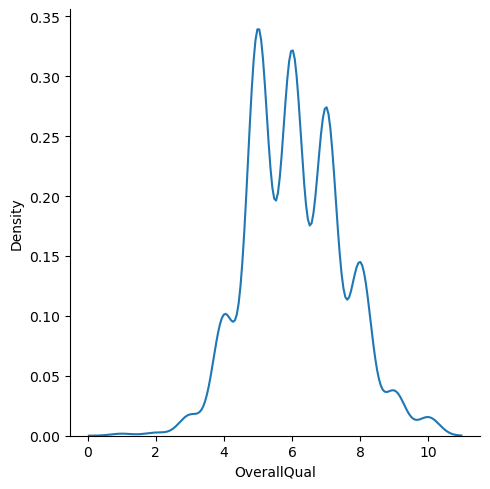

--------------------------------------------------
TotRmsAbvGrd
Mínimo: 2.0
Media: 6.517808219178082
Máximo: 14.0
Rango: 12.0
Desviación: 1.625393290584064


C:\Users\DevOs\anaconda3\envs\dsp_1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


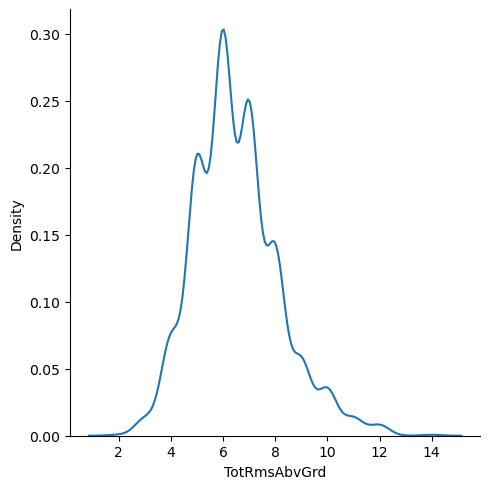

--------------------------------------------------


In [89]:
for col in discretas:
    estadisticos = dfHousePrice[col].describe()
    print(col)
    print(f'Mínimo: {estadisticos["min"]}')
    print(f'Media: {estadisticos["mean"]}')
    print(f'Máximo: {estadisticos["max"]}')
    print(f'Rango: {np.ptp(dfHousePrice[col], axis=0)}')
    print(f'Desviación: {estadisticos["std"]}')
    sns.displot(dfHousePrice, x=col, kind='kde')
    plt.show()
    print('-'*50)

### 5. Para cada variable independiente x:

Correlacion entre: SalePrice y OverallQual


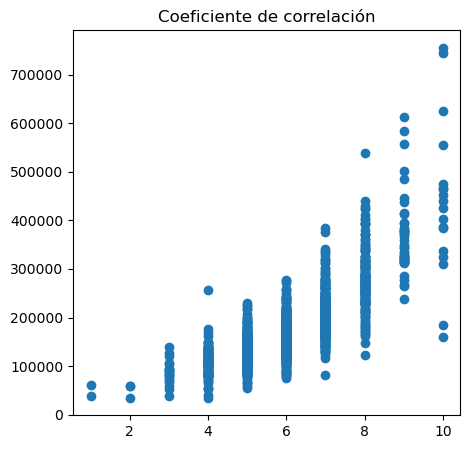

[1.        0.7909816]
Correlacion entre: SalePrice y 1stFlrSF


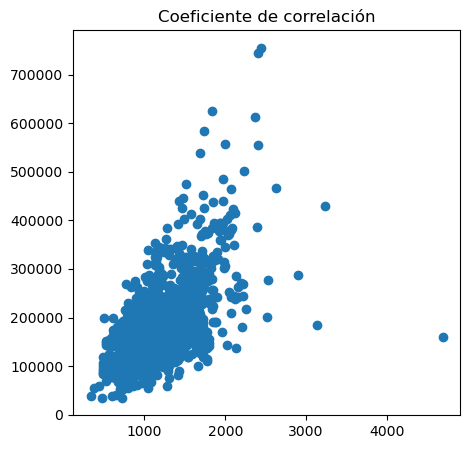

[1.         0.60585218]
Correlacion entre: SalePrice y TotRmsAbvGrd


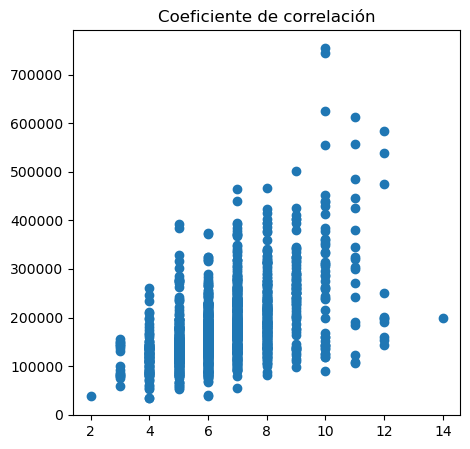

[1.         0.53372316]
Correlacion entre: SalePrice y YearBuilt


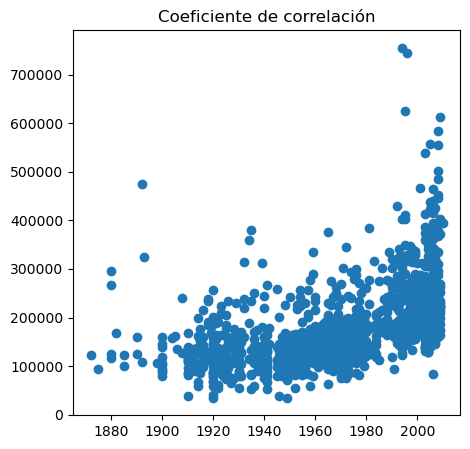

[1.         0.52289733]
Correlacion entre: SalePrice y LotFrontage


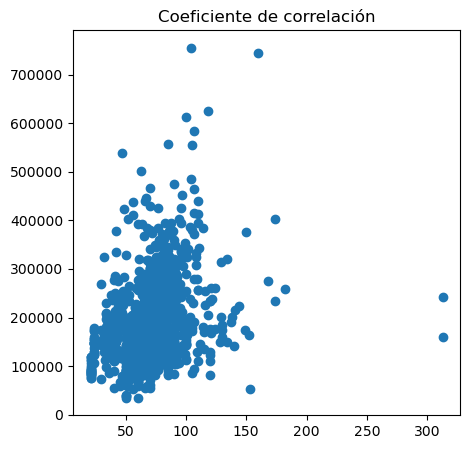

[1.         0.33490085]


In [110]:
#Coeficiente de correlación entre x y y

for col in dfHousePrice.columns:
    if col != 'SalePrice':
        print(f'Correlacion entre: SalePrice y {col}')
        x = dfHousePrice[col]
        y = dfHousePrice['SalePrice']
    
        plt.figure(figsize=(5,5))
        plt.scatter(x, y)
        plt.title('Coeficiente de correlación')
        plt.show()
        
        coef = np.corrcoef(x, y)
        print(coef[0])

<Axes: ylabel='Coeficiente de correlación'>

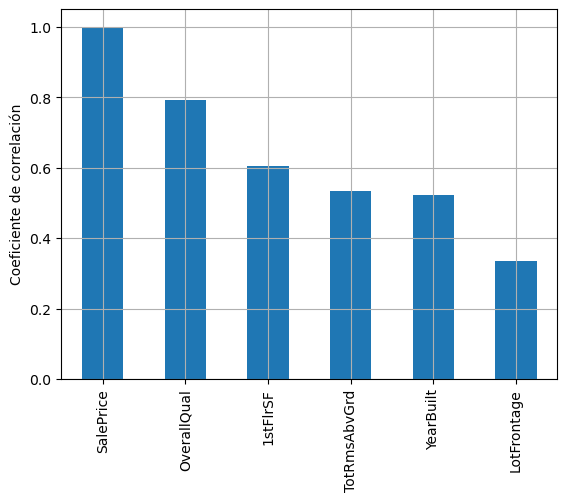

In [111]:
dfHousePrice.corr()["SalePrice"].plot.bar(grid=True, ylabel="Coeficiente de correlación")

### 6) Creación de función para entrenar el modelo de regresión lineal de una variable 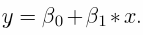

In [ ]:
def train_model(x, y, epochs, imprimir_error_cata, learning_rate):
    